# **<font color=#0b5bdb> Project name: Supermarket Sales </font>**

This notebook covers the exploratory data analysis on supermarket sales dataset

<img src="https://c1.wallpaperflare.com/preview/127/182/407/grocery-store-supermarket-vegetable-shop.jpg" alt="Image" height="300" width="600">

<font color=#0b5bdb> **Dataset Description:**</font>
- **Invoice ID:** Computer generated sales slip invoice identification number
- **Branch:**     Branch of supercenter (3 branches are available identified by A, B and C)
- **City:** Location of supercenters
- **Customer type:** Type of customers, recorded by Members for customers using member card and Normal for without member card
- **Gender:** Gender type of customer
- **Product line:** General item categorization groups 
- **Unit price:** Price of each product in USD
- **QuantityNumber:** of products purchased by customer
- **Tax 5%:** 5% tax fee for customer buying
- **Total:** Total price including tax
- **Date:** Date of purchase 
- **Time:** Purchase time
- **Payment:** Payment used by customer for purchase 
- **cogs:** Cost of goods sold
- **gross margin percentage:** Gross margin percentage
- **gross income:** Gross income
- **Rating:** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## **Data upload** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset path
file_path = 'data/supermarket_sales.csv'

# reading our dataset as a dataframe
df_sales = pd.read_csv(file_path)

# taking a first look on our data
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## **Details of dataset and cleaning** 

In [3]:
# num of rows x num of columns
print('Dataset Dimensions:',df_sales.shape)

print('----------------------------------------')

# creating a list of columns
print('Columns List: \n')
print(df_sales.columns.tolist())

print('----------------------------------------')
# types of each column
print(df_sales.dtypes)

Dataset Dimensions: (1000, 17)
----------------------------------------
Columns List: 

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
----------------------------------------
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


<font color=#0b5bdb>**Convert 'Date' and 'Time' datatype from object to datetime**</font>

In [4]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales['Date'].dtype

dtype('<M8[ns]')

In [5]:
# split the Date column into 3 columns 
df_sales['Day'] = (df_sales['Date']).dt.day
df_sales['Month'] = (df_sales['Date']).dt.month
df_sales['Year'] = (df_sales['Date']).dt.year


In [6]:
df_sales["Time"]= pd.to_datetime(df_sales["Time"])
df_sales['Time'].dtype

dtype('<M8[ns]')

In [7]:
# Split the Time column into 2 columns 
df_sales['Hour'] = pd.to_datetime(df_sales['Time'], format='%H:%M').dt.hour
df_sales['Minute'] = pd.to_datetime(df_sales['Time'], format='%H:%M').dt.minute


In [8]:
# Drop Date and Time Columns
df_sales.drop(['Date', 'Time'], axis=1, inplace=True)

<font color=#0b5bdb>**Check for null values**</font>

In [9]:
df_sales.isnull().sum() # To check null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Hour                       0
Minute                     0
dtype: int64

**There are no null values in our dataset!**

If you find one, there are three methods to approach:
- 1. Removing 
- 2. Imputing
- 3. Masking
 
Below an example:

In [10]:
# Imputaion by average value (Mean!)
avg_unit_price = df_sales["Unit price"].astype("float").mean(axis=0)
df_sales["Unit price"].replace(np.nan, avg_unit_price, inplace=True)

# Imputation by most frequent (Mode!):
from scipy import stats
mode=stats.mode(df_sales['Quantity'])
df_sales['Quantity'].replace(np.nan, "mode", inplace=True)

# Removing rest or remanining values
#df_sales.dropna(inplace=True)

# check again for null values:
df_sales.isnull().sum() 

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Hour                       0
Minute                     0
dtype: int64

In [11]:
df_sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000,30.09800
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857,16.88068
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000,0.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000,16.00000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000,30.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000,44.00000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000,59.00000


<font color=#0b5bdb>**Show the range and median of numerical columns**</font>

In [12]:
# Select just the rows desired from the 'describe' method and add in the 'median'
sales_X = df_sales.describe()
sales_X.loc['range'] = sales_X.loc['max'] - sales_X.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
sales_X = sales_X.loc[out_fields]
sales_X.rename({'50%': 'median'}, inplace=True)
sales_X

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
mean,55.67213,5.51,15.379369,322.966749,307.58738,4.761905,15.379369,6.9727,15.256,1.993,2019.0,14.91,30.098
25%,32.87500,3.00,5.924875,124.422375,118.49750,4.761905,5.924875,5.5000,8.000,1.000,2019.0,12.00,16.000
median,55.23000,5.00,12.088000,253.848000,241.76000,4.761905,12.088000,7.0000,15.000,2.000,2019.0,15.00,30.000
75%,77.93500,8.00,22.445250,471.350250,448.90500,4.761905,22.445250,8.5000,23.000,3.000,2019.0,18.00,44.000
range,89.88000,9.00,49.141500,1031.971500,982.83000,0.000000,49.141500,6.0000,30.000,2.000,0.0,10.00,59.000


<font color=#0b5bdb>**List of all categorical data in dataset**</font>

In [13]:
categorical_columns = [colname for colname in df_sales.columns if df_sales[colname].dtype == "object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [14]:
for col in categorical_columns:
    print("# unique values in '{0}': {1}".format(col, len(df_sales[col].unique().tolist())))

# unique values in 'Invoice ID': 1000
# unique values in 'Branch': 3
# unique values in 'City': 3
# unique values in 'Customer type': 2
# unique values in 'Gender': 2
# unique values in 'Product line': 6
# unique values in 'Payment': 3


<font color=#0b5bdb>**Calculate mean of the numerical columns based on grouping by categorical columns**</font>

In [15]:
df_sales.groupby('Branch').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Branch,,,,,,,,,,,,,
A,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059,15.388235,2.023529,2019.0,14.667647,28.682353
B,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072,15.265060,2.003012,2019.0,15.147590,31.403614
C,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866,15.109756,1.951220,2019.0,14.920732,30.243902


In [16]:
df_sales.groupby('City').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
City,,,,,,,,,,,,,
Mandalay,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072,15.265060,2.003012,2019.0,15.147590,31.403614
Naypyitaw,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866,15.109756,1.951220,2019.0,14.920732,30.243902
Yangon,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059,15.388235,2.023529,2019.0,14.667647,28.682353


In [17]:
df_sales.groupby('Customer type').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Customer type,,,,,,,,,,,,,
Member,56.206986,5.558882,15.609110,327.791305,312.182196,4.761905,15.609110,6.940319,14.960080,1.988024,2019.0,14.970060,30.315369
Normal,55.135130,5.460922,15.148707,318.122856,302.974148,4.761905,15.148707,7.005210,15.553106,1.997996,2019.0,14.849699,29.879760


In [18]:
df_sales.groupby('Gender').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Gender,,,,,,,,,,,,,
Female,55.263952,5.726547,15.956936,335.095659,319.138723,4.761905,15.956936,6.964471,14.812375,1.970060,2019.0,14.642715,29.942116
Male,56.081944,5.292585,14.799487,310.789226,295.989739,4.761905,14.799487,6.980962,15.701403,2.016032,2019.0,15.178357,30.254509


In [19]:
df_sales.groupby('Product line').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Product line,,,,,,,,,,,,,
Electronic accessories,53.551588,5.711765,15.220597,319.632538,304.411941,4.761905,15.220597,6.924706,16.229412,2.047059,2019.0,14.988235,29.400000
Fashion accessories,57.153652,5.067416,14.528062,305.089298,290.561236,4.761905,14.528062,7.029213,15.264045,1.943820,2019.0,15.056180,29.825843
Food and beverages,56.008851,5.471264,15.365310,322.671517,307.306207,4.761905,15.365310,7.113218,15.201149,2.000000,2019.0,15.385057,29.770115
Health and beauty,54.854474,5.618421,15.411572,323.643020,308.231447,4.761905,15.411572,7.003289,15.611842,2.052632,2019.0,14.868421,29.828947
Home and lifestyle,55.316937,5.693750,16.030331,336.636956,320.606625,4.761905,16.030331,6.837500,14.293750,2.025000,2019.0,14.450000,33.212500
Sports and travel,56.993253,5.542169,15.812630,332.065220,316.252590,4.761905,15.812630,6.916265,14.909639,1.897590,2019.0,14.656627,28.692771


In [20]:
df_sales.groupby('Payment').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Payment,,,,,,,,,,,,,
Cash,56.758983,5.511628,15.532471,326.181890,310.649419,4.761905,15.532471,6.970058,15.511628,1.965116,2019.0,14.712209,30.755814
Credit card,54.394469,5.536977,15.429042,324.009878,308.580836,4.761905,15.429042,7.003215,14.790997,1.983923,2019.0,14.961415,28.623794
Ewallet,55.740174,5.484058,15.181933,318.820600,303.638667,4.761905,15.181933,6.947826,15.420290,2.028986,2019.0,15.060870,30.771014


<font color=#0b5bdb>**Data Visualization**</font>

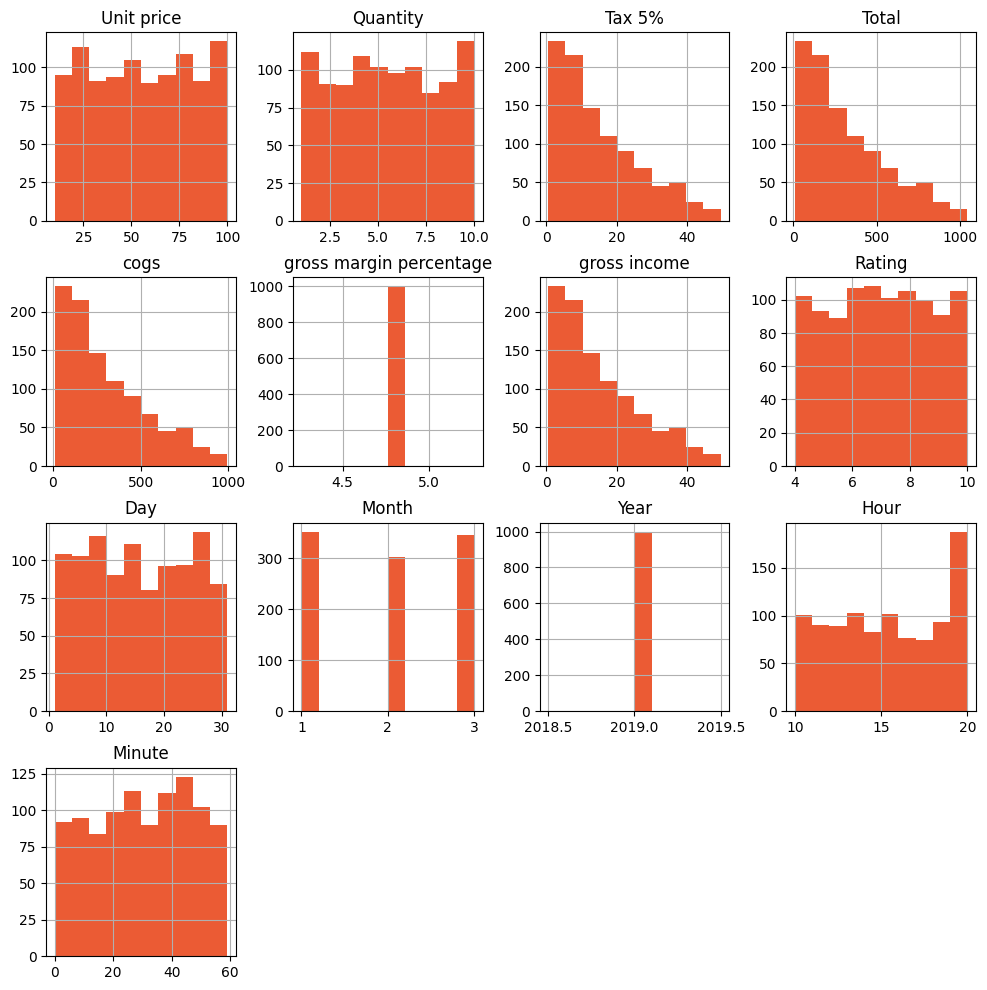

In [21]:
# Plotting Histogram for all numeric features
df_sales.hist(figsize=(12,12), color='#eb5b34')
plt.show()

Branch A - 340
Branch B - 328
Branch C - 332


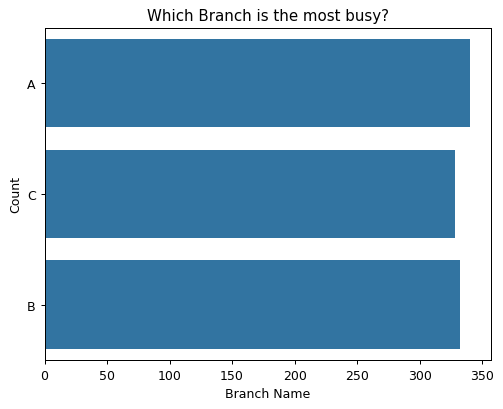

In [22]:
# Branch Count
plt.figure(dpi=90)
sns.countplot(df_sales['Branch'])
plt.xlabel('Branch Name')
plt.ylabel('Count')
plt.title('Which Branch is the most busy?')
A,B,C =df_sales.Branch.value_counts()

print('Branch A -',A)
print('Branch B -',C)
print('Branch C -',B)

E-wallet - 345
Cash - 344
Credit Card - 311


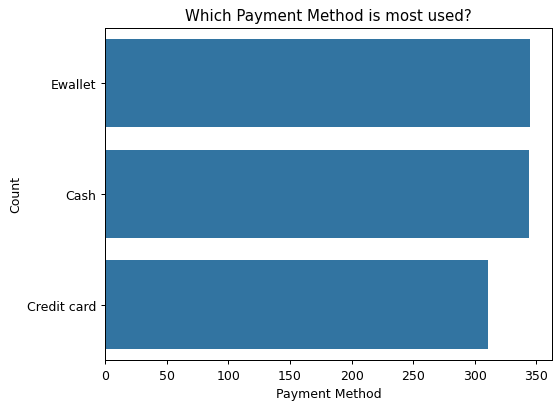

In [23]:
plt.figure(dpi=90)
sns.countplot(df_sales['Payment'])
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Which Payment Method is most used?')
A,B,C =df_sales.Payment.value_counts()

print('E-wallet -',A)
print('Cash -',B)
print('Credit Card -',C)
plt.show()



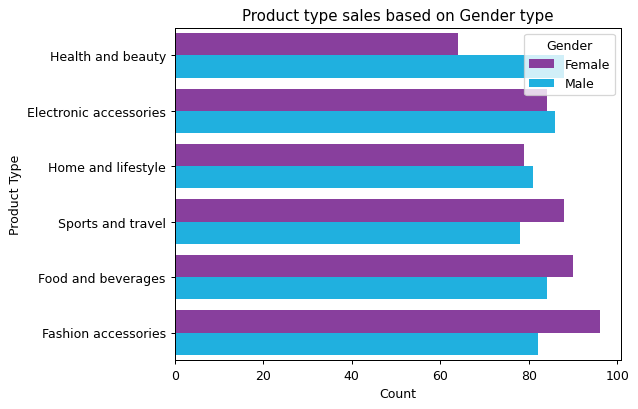

In [24]:
plt.figure(dpi=90)
sns.countplot(y ='Product line', hue = "Gender", data = df_sales, palette = sns.color_palette(['#902fad', '#00c0ff'])) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.title('Product type sales based on Gender type')
plt.show()

## **Corr**

In [25]:
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10,37


<font color=#0b5bdb>**Finding the correlations between the features.**</font>

In [26]:
# display the correlations 
np.round(df_sales.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.06,-0.03,NaN,0.01,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,-0.04,-0.01,NaN,-0.01,-0.01
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.01,-0.04,NaN,-0.03,0.05
Day,0.06,-0.04,-0.00,-0.00,-0.00,NaN,-0.00,-0.01,1.00,-0.12,NaN,0.02,0.01
Month,-0.03,-0.01,-0.02,-0.02,-0.02,NaN,-0.02,-0.04,-0.12,1.00,NaN,0.04,-0.01


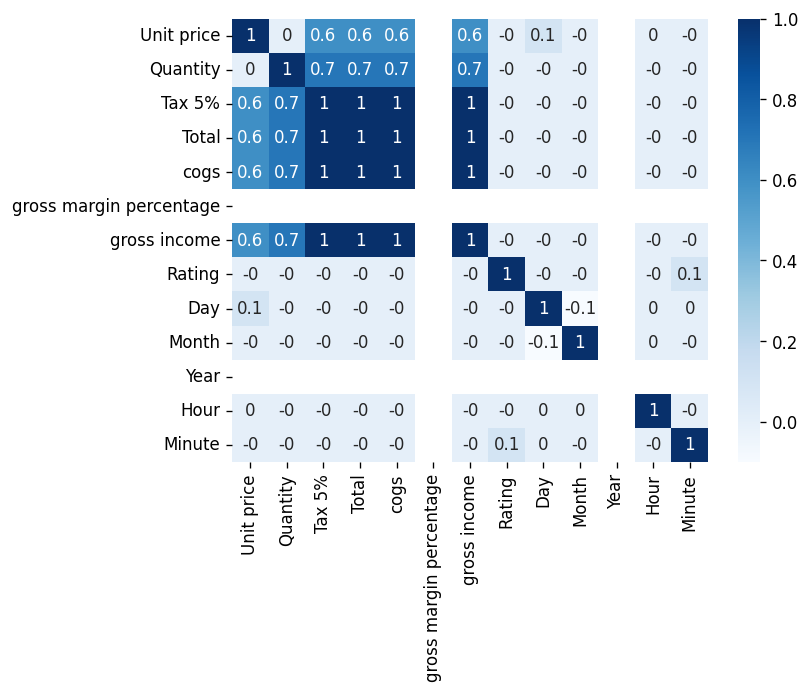

In [27]:
plt.figure(dpi=120)
sns.heatmap(np.round(df_sales.corr(),1),annot=True, cmap="Blues")
plt.show()

**The best correlations are between Total, Tax 5%, Gross Income and cogs:**
- Total and Tax 5% : 1
- Total and gross income: 1
- Total and cogs : 1
**as well we have very good correlations between Total, Unit price and Quantity**
- Total and Unit Price: 0.6 
- Total and Quantity: 0.7
